In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mlflow.data


***Descripción del dataset***

Datos de acelerómetro provenientes de vibraciones de un ventilador de enfriamiento con pesos en sus aspas. Puede ser utilizado para predicciones, clasificaciones y otras tareas que requieran análisis de vibración, especialmente en motores. Información adicional:

Este conjunto de datos fue generado para ser utilizado en el proyecto "Predicción del Tiempo de Falla de un Motor Utilizando una Red Neuronal Artificial" (DOI: 10.3390/s19194342). Se utilizó un ventilador de enfriamiento con pesos en sus aspas para generar vibraciones. A este ventilador se le adjuntó un acelerómetro para recoger los datos de vibración. Con estos datos, se realizaron predicciones del tiempo de falla del motor utilizando redes neuronales artificiales. Para generar tres escenarios de vibración distintos, los pesos se distribuyeron de tres maneras diferentes: 1) 'rojo' - configuración normal: dos piezas de peso posicionadas en aspas vecinas; 2) 'azul' - configuración perpendicular: dos piezas de peso posicionadas en aspas formando un ángulo de 90°; 3) 'verde' - configuración opuesta: dos piezas de peso posicionadas en aspas opuestas. Un diagrama esquemático puede verse en la figura 3 del documento.

Dispositivos utilizados: Ventilador de enfriamiento Akasa AK-FN059 de 12 cm Viper (Genera las vibraciones) Acelerómetro MMA8452Q (Mide la vibración)

Método de recolección de datos: Se establecieron 17 velocidades de rotación, que van del 20% al 100% de la velocidad máxima del enfriador en intervalos del 5%; para las tres configuraciones de distribución de pesos en las aspas del ventilador. Note que el enfriador Akasa AK-FN059 tiene una velocidad máxima de rotación de 1900 rpm.

Las mediciones de vibración se recogieron a una frecuencia de 20 ms durante 1 minuto para cada porcentaje, generando 3000 registros por velocidad. Así, en total, se recogieron 153,000 registros de vibración del modelo de simulación.

***Carga de datos***

In [5]:
df = pd.read_csv("/home/kurtbadelt/MNA/MLOPS/MLOps/notebooks/Actividades/Fase1/equipo16_accel/data/raw/accelerometer.csv")

In [6]:
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


***Fase de exploración y  limpieza de datos***

In [7]:
#Elminar filas con valores nulos
df = df.dropna()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

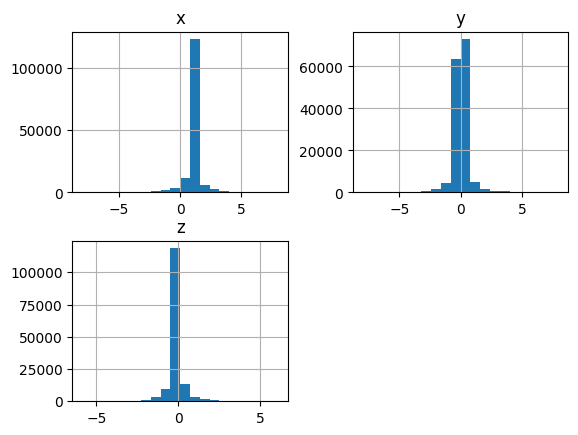

In [8]:
#graficar los histogramas de las columnas x, y, z
df.hist(column=['x', 'y', 'z'], bins=20)


***KDE***: significa "Estimación de Densidad Kernel". Es un método utilizado en estadísticas para estimar la función de densidad de probabilidad de una variable aleatoria. KDE es particularmente útil para visualizar la forma de una distribución y puede proporcionar una curva suave que representa la densidad de los puntos de datos, lo cual es útil para identificar patrones, picos y valores atípicos dentro de los datos.

KeyboardInterrupt: 

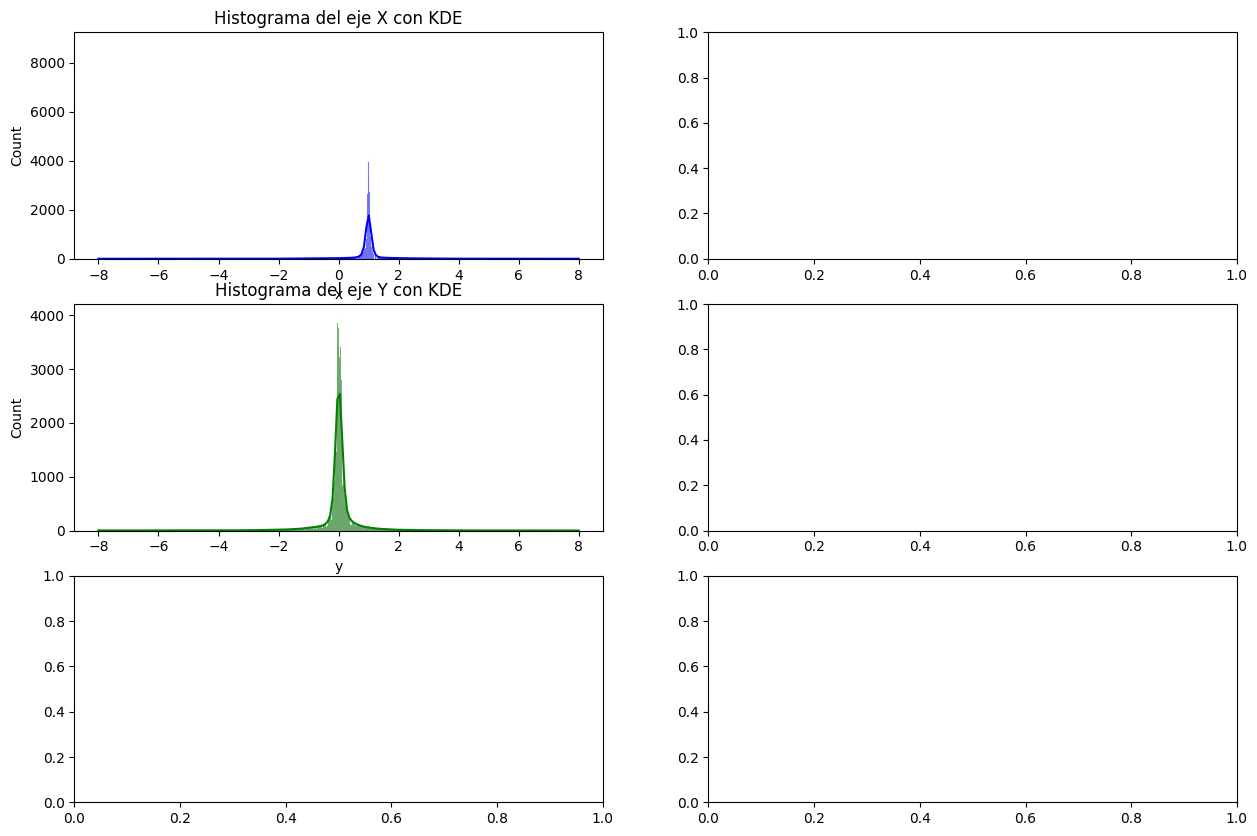

In [9]:


fig, axes = plt.subplots(3, 2, figsize=(15, 10))


sns.histplot(df['x'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Histograma del eje X con KDE')


sns.histplot(df['y'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Histograma del eje Y con KDE')


sns.histplot(df['z'], kde=True, ax=axes[2, 0], color='red')
axes[2, 0].set_title('Histograma del eje Z con KDE')


sns.kdeplot(df['x'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('X KDE')

sns.kdeplot(df['y'], ax=axes[1, 1], color='green')
axes[1, 1].set_title('Y KDE')

sns.kdeplot(df['z'], ax=axes[2, 1], color='red')
axes[2, 1].set_title('Z KDE')

plt.tight_layout()

In [7]:
# Summary statistics for accelerometer readings (x, y, z) across different configurations (wconfid) and RPM levels (pctid)
summary_stats = df.groupby(['wconfid', 'pctid'])[['x', 'y', 'z']].describe()
print(summary_stats)

                    x                                                         \
                count      mean       std    min    25%    50%    75%    max   
wconfid pctid                                                                  
1       20     3000.0  0.994849  0.025042  0.914  0.977  0.992  1.012  1.117   
        25     3000.0  0.995045  0.027093  0.922  0.977  0.988  1.016  1.113   
        30     3000.0  0.994939  0.023610  0.828  0.980  0.996  1.012  1.180   
        35     3000.0  0.994902  0.029998  0.848  0.973  0.996  1.016  1.121   
        40     3000.0  0.994451  0.035541  0.863  0.973  0.996  1.016  1.145   
        45     3000.0  0.993610  0.052492  0.770  0.961  0.992  1.027  1.203   
        50     3000.0  0.991978  0.069479  0.746  0.949  0.992  1.039  1.207   
        55     3000.0  0.994833  0.115088  0.578  0.914  1.004  1.074  1.363   
        60     3000.0  0.991798  0.141092  0.289  0.898  1.000  1.090  1.363   
        65     3000.0  1.019348  0.14857

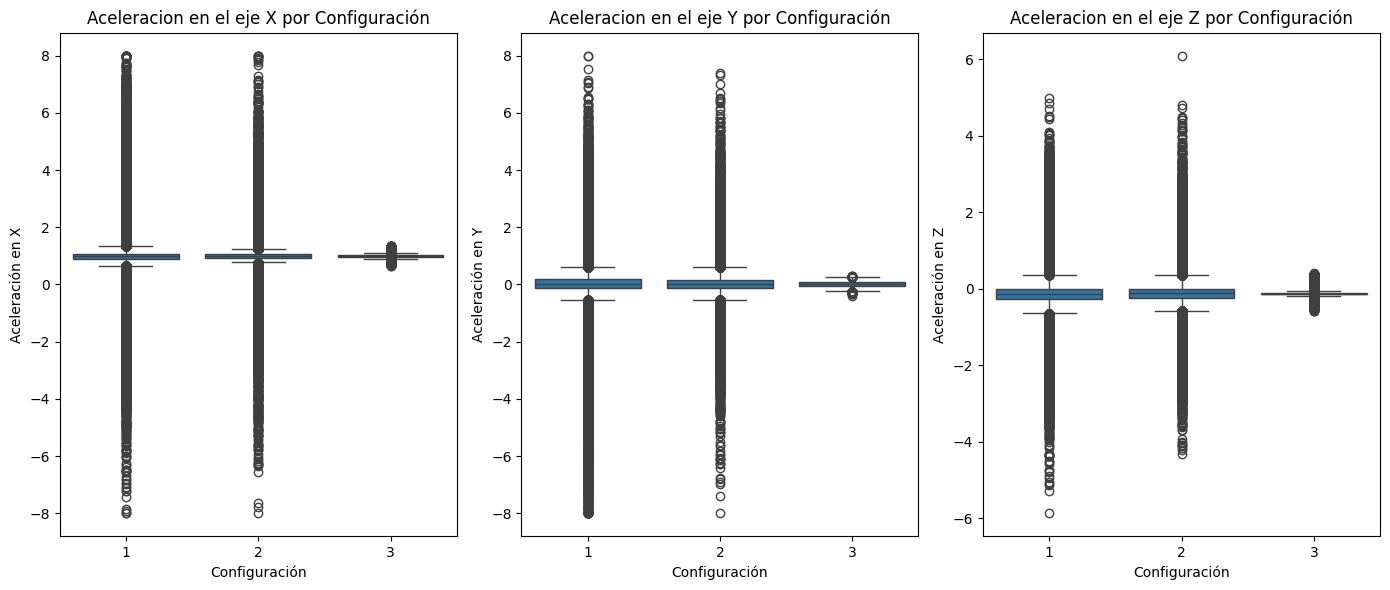

In [8]:
# Creating boxplots for each axis to compare distributions across different configurations

plt.figure(figsize=(14, 6))

# Boxplot for X-axis
plt.subplot(1, 3, 1)
sns.boxplot(x='wconfid', y='x', data=df)
plt.title('Aceleracion en el eje X por Configuración')
plt.xlabel('Configuración')
plt.ylabel('Aceleración en X')

# Boxplot for Y-axis
plt.subplot(1, 3, 2)
sns.boxplot(x='wconfid', y='y', data=df)
plt.title('Aceleracion en el eje Y por Configuración')
plt.xlabel('Configuración')
plt.ylabel('Aceleración en Y')

# Boxplot for Z-axis
plt.subplot(1, 3, 3)
sns.boxplot(x='wconfid', y='z', data=df)
plt.title('Aceleracion en el eje Z por Configuración')
plt.xlabel('Configuración')
plt.ylabel('Aceleración en Z')

plt.tight_layout()
plt.show()


***Análisis de correlación***

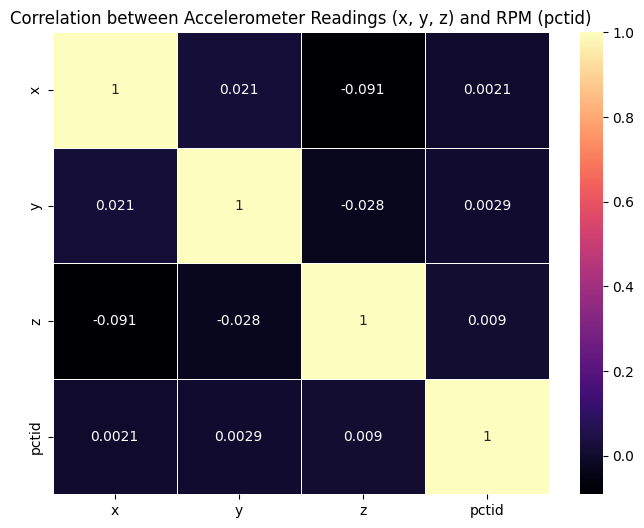

In [9]:
# Compute the correlation matrix between the accelerometer readings (x, y, z) and RPM speed (pctid)
correlation_matrix = df[['x', 'y', 'z', 'pctid']].corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation between Accelerometer Readings (x, y, z) and RPM (pctid)')
plt.show()


***Time Series***

***Análisis en Z***

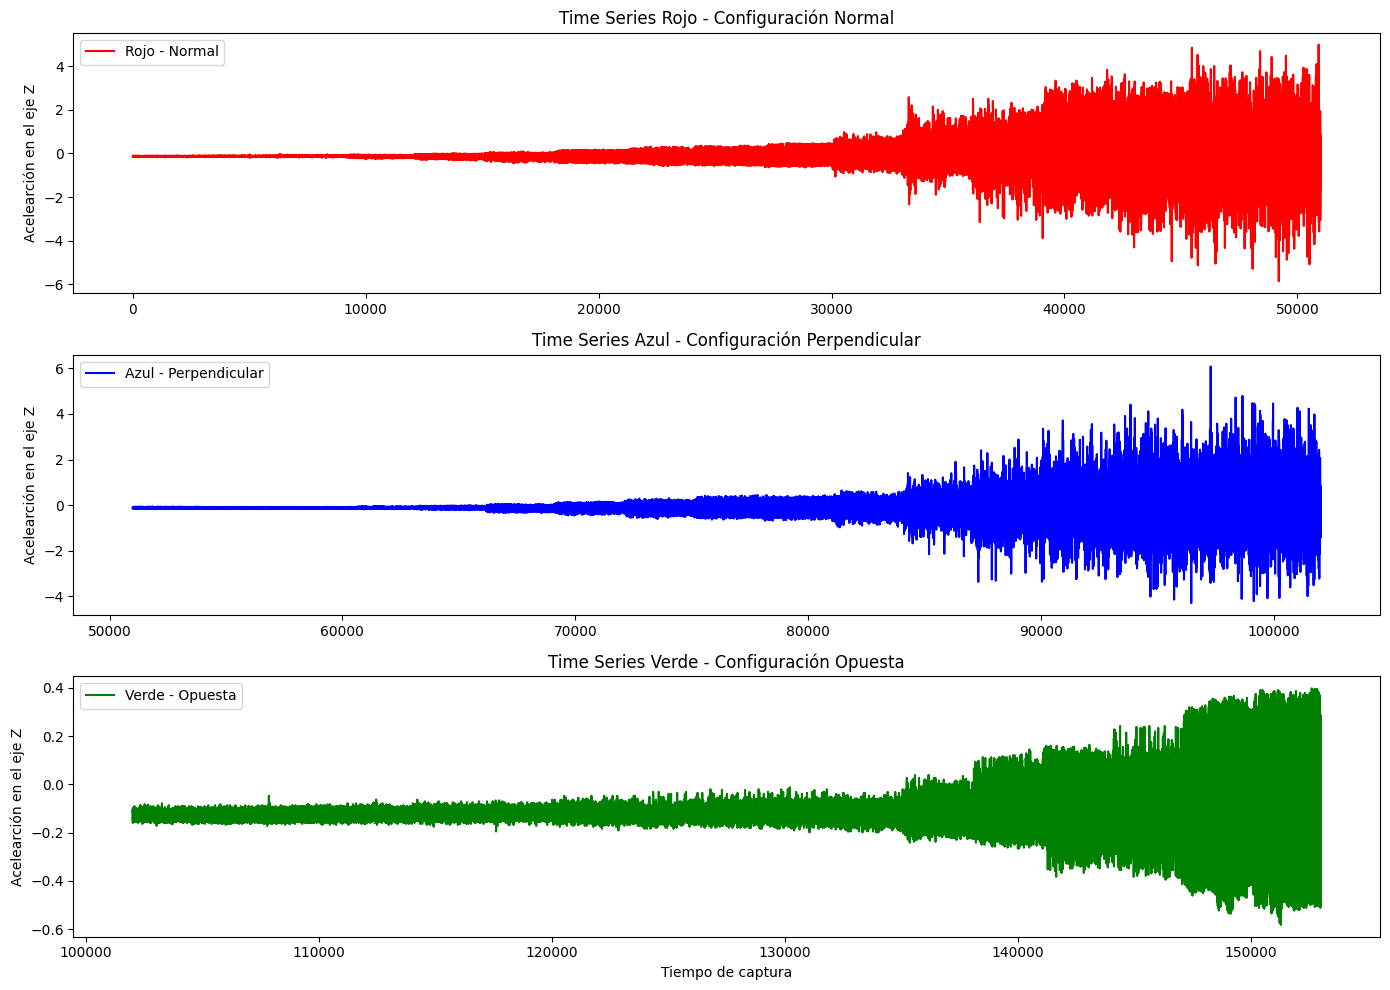

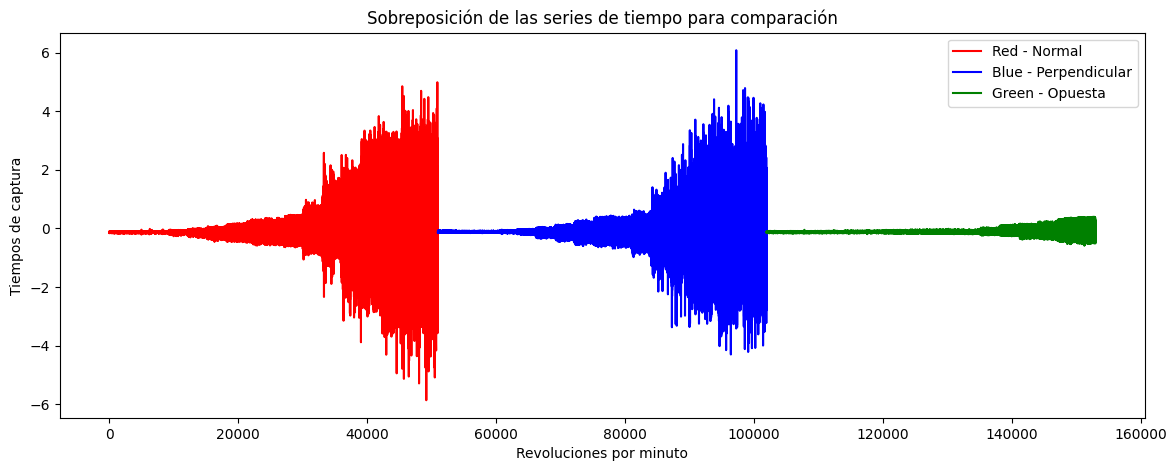

In [10]:
# Assuming that the data is sorted in the order it was collected and that we can use the index as a time series
df['time'] = df.index

# Filter the data for different configurations
data_red = df[df['wconfid'] == 1]
data_blue = df[df['wconfid'] == 2]
data_green = df[df['wconfid'] == 3]

# Plotting time series for each configuration
plt.figure(figsize=(14, 10))

# Plot for 'red' configuration
plt.subplot(3, 1, 1)
plt.plot(data_red['time'], data_red['z'], 'r-', label='Rojo - Normal')
plt.title('Time Series Rojo - Configuración Normal')
plt.ylabel('Acelearción en el eje Z')
plt.legend()

# Plot for 'blue' configuration
plt.subplot(3, 1, 2)
plt.plot(data_blue['time'], data_blue['z'], 'b-', label='Azul - Perpendicular')
plt.title('Time Series Azul - Configuración Perpendicular')
plt.ylabel('Acelearción en el eje Z')
plt.legend()

# Plot for 'green' configuration
plt.subplot(3, 1, 3)
plt.plot(data_green['time'], data_green['z'], 'g-', label='Verde - Opuesta')
plt.title('Time Series Verde - Configuración Opuesta')
plt.ylabel('Acelearción en el eje Z')
plt.legend()

plt.xlabel('Tiempo de captura')
plt.tight_layout()
plt.show()

# Overlay plots for comparison
plt.figure(figsize=(14, 5))
plt.plot(data_red['time'], data_red['z'], 'r-', label='Red - Normal')
plt.plot(data_blue['time'], data_blue['z'], 'b-', label='Blue - Perpendicular')
plt.plot(data_green['time'], data_green['z'], 'g-', label='Green - Opuesta')
plt.title('Sobreposición de las series de tiempo para comparación')
plt.xlabel('Revoluciones por minuto')
plt.ylabel('Tiempos de captura')
plt.legend()
plt.show()


***Análisis en X***

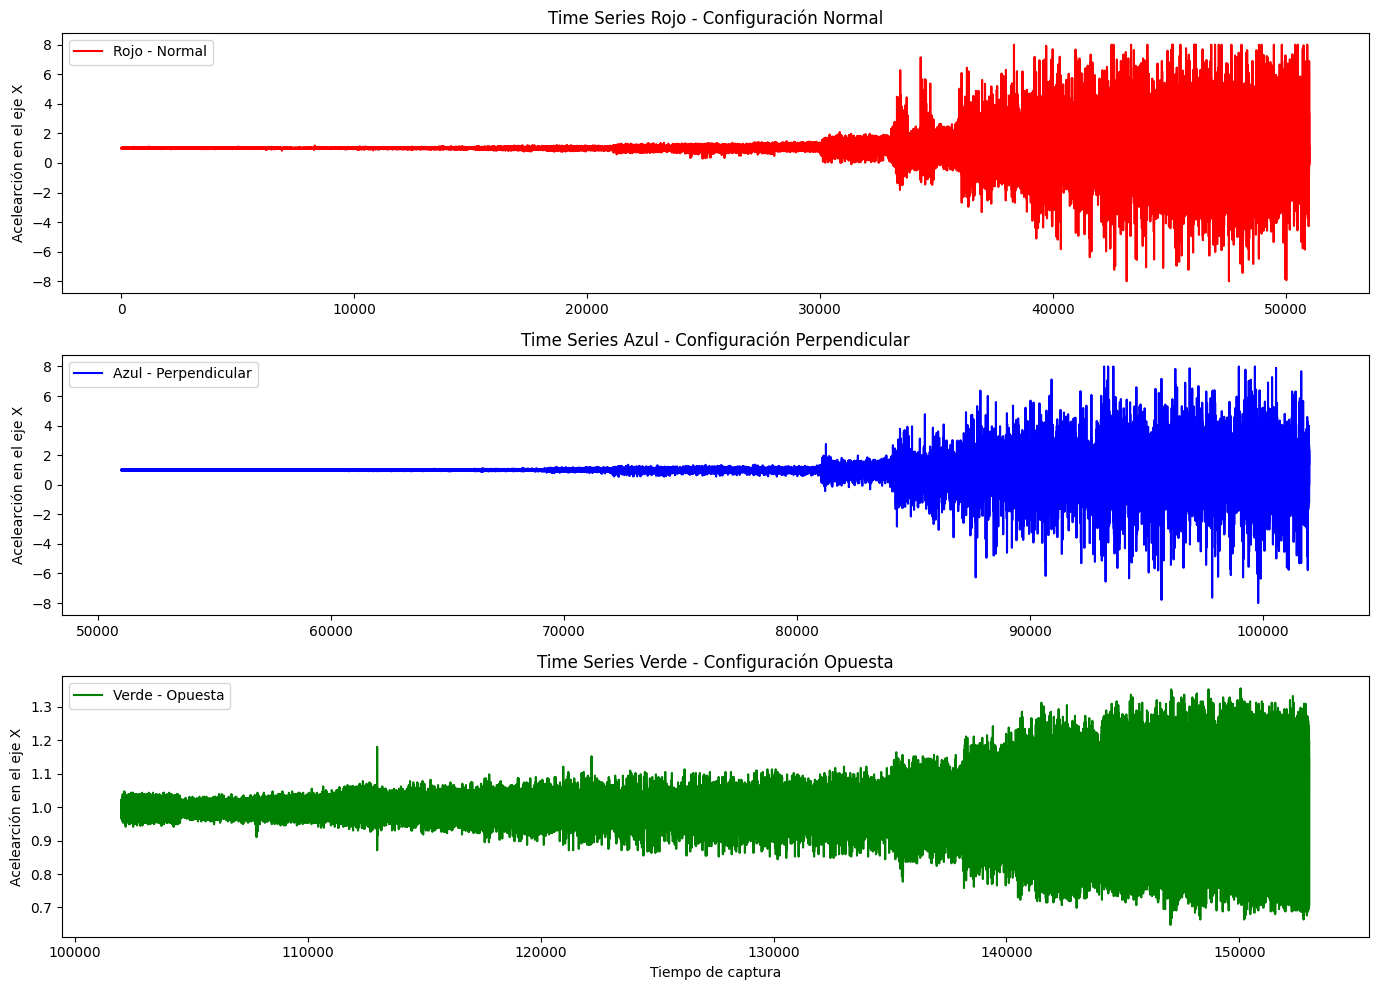

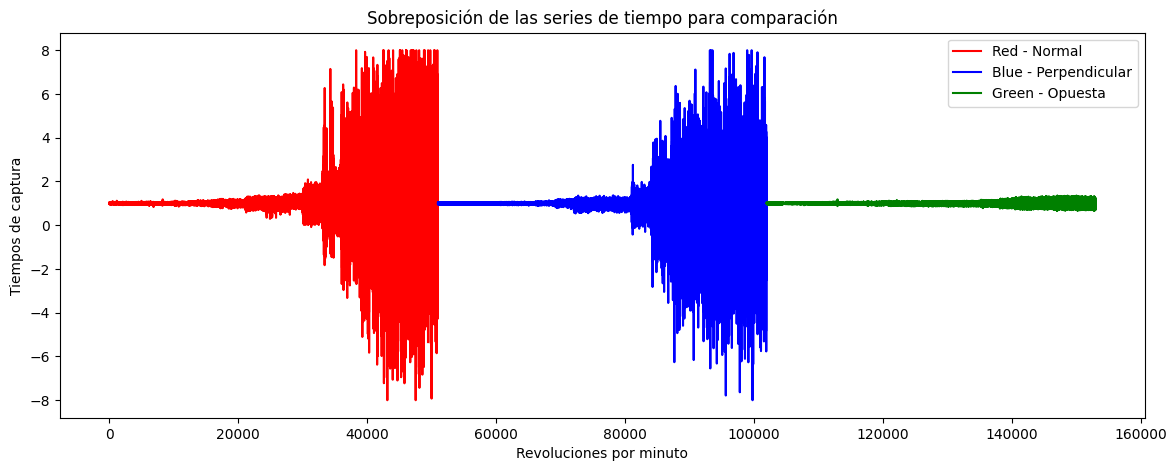

In [11]:
df['time'] = df.index

# Filter the data for different configurations
data_red = df[df['wconfid'] == 1]
data_blue = df[df['wconfid'] == 2]
data_green = df[df['wconfid'] == 3]

# Plotting time series for each configuration
plt.figure(figsize=(14, 10))

# Plot for 'red' configuration
plt.subplot(3, 1, 1)
plt.plot(data_red['time'], data_red['x'], 'r-', label='Rojo - Normal')
plt.title('Time Series Rojo - Configuración Normal')
plt.ylabel('Acelearción en el eje X')
plt.legend()

# Plot for 'blue' configuration
plt.subplot(3, 1, 2)
plt.plot(data_blue['time'], data_blue['x'], 'b-', label='Azul - Perpendicular')
plt.title('Time Series Azul - Configuración Perpendicular')
plt.ylabel('Acelearción en el eje X')
plt.legend()

# Plot for 'green' configuration
plt.subplot(3, 1, 3)
plt.plot(data_green['time'], data_green['x'], 'g-', label='Verde - Opuesta')
plt.title('Time Series Verde - Configuración Opuesta')
plt.ylabel('Acelearción en el eje X')
plt.legend()

plt.xlabel('Tiempo de captura')
plt.tight_layout()
plt.show()

# Overlay plots for comparison
plt.figure(figsize=(14, 5))
plt.plot(data_red['time'], data_red['x'], 'r-', label='Red - Normal')
plt.plot(data_blue['time'], data_blue['x'], 'b-', label='Blue - Perpendicular')
plt.plot(data_green['time'], data_green['x'], 'g-', label='Green - Opuesta')
plt.title('Sobreposición de las series de tiempo para comparación')
plt.xlabel('Revoluciones por minuto')
plt.ylabel('Tiempos de captura')
plt.legend()
plt.show()

***Análisis en Y***

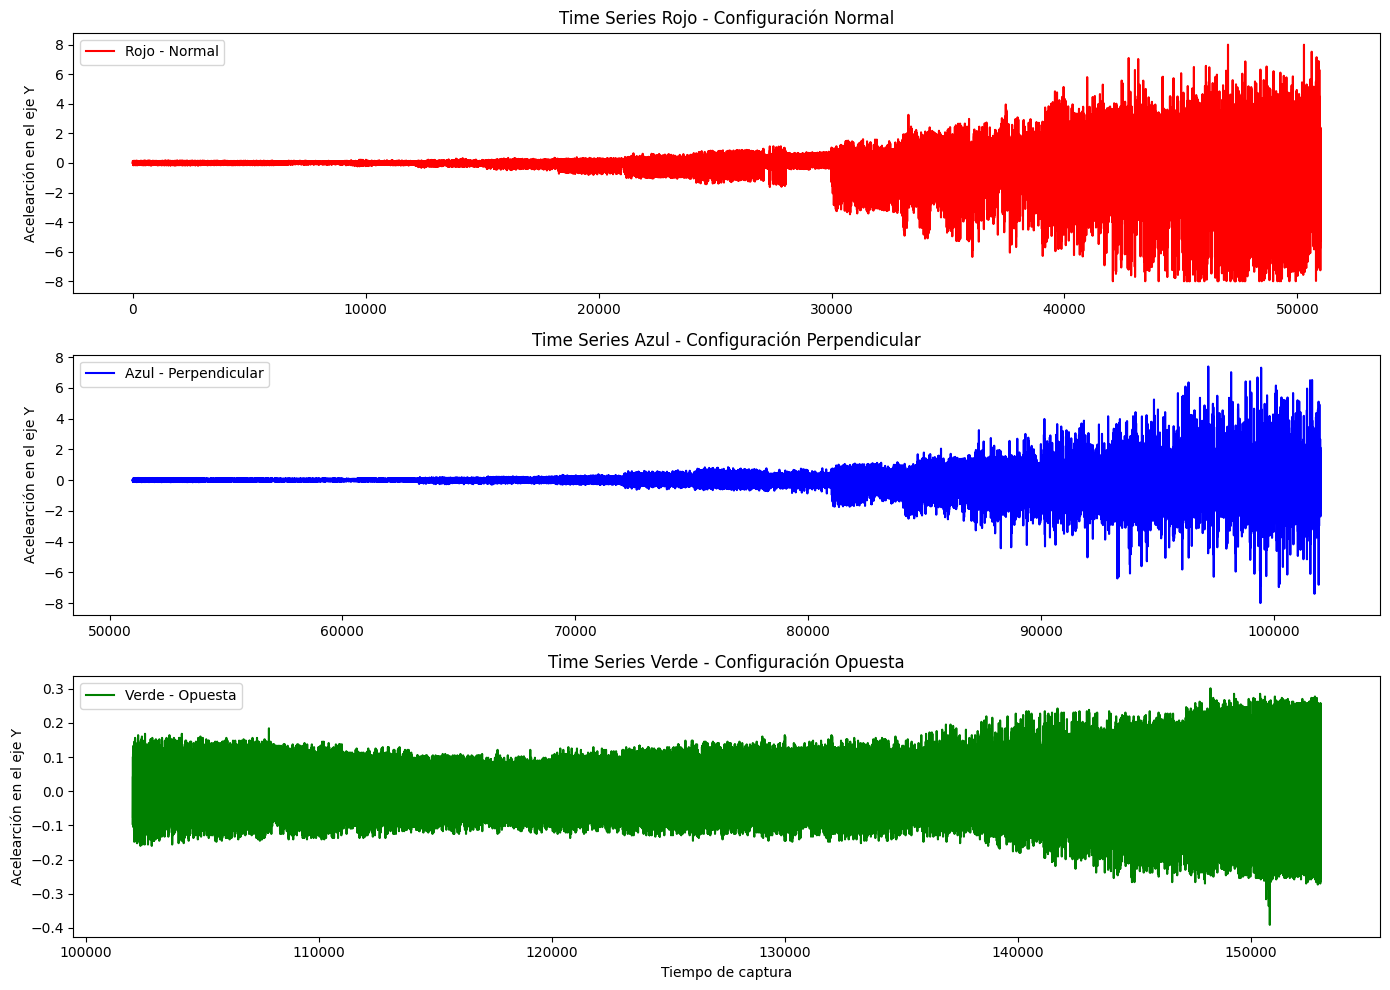

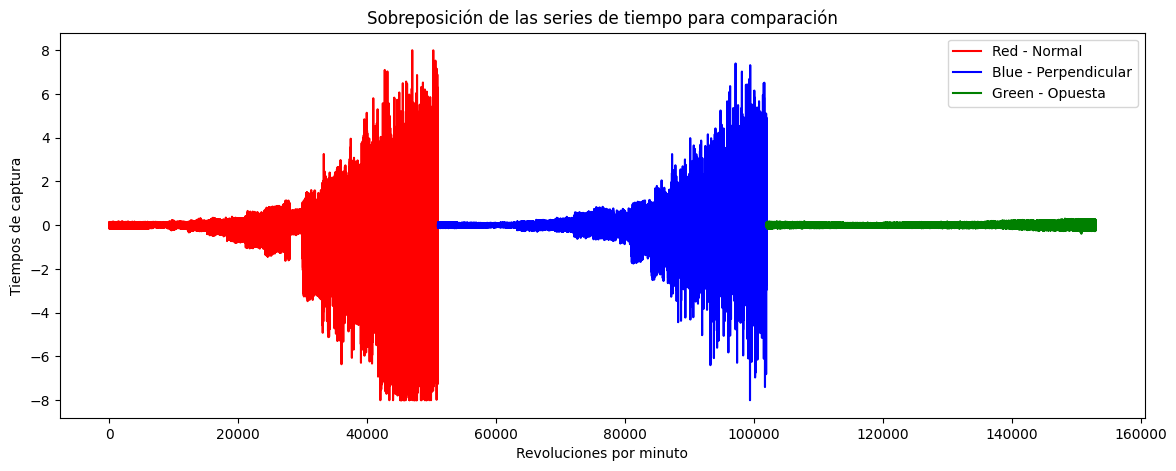

In [12]:
df['time'] = df.index

# Filter the data for different configurations
data_red = df[df['wconfid'] == 1]
data_blue = df[df['wconfid'] == 2]
data_green = df[df['wconfid'] == 3]

# Plotting time series for each configuration
plt.figure(figsize=(14, 10))

# Plot for 'red' configuration
plt.subplot(3, 1, 1)
plt.plot(data_red['time'], data_red['y'], 'r-', label='Rojo - Normal')
plt.title('Time Series Rojo - Configuración Normal')
plt.ylabel('Acelearción en el eje Y')
plt.legend()

# Plot for 'blue' configuration
plt.subplot(3, 1, 2)
plt.plot(data_blue['time'], data_blue['y'], 'b-', label='Azul - Perpendicular')
plt.title('Time Series Azul - Configuración Perpendicular')
plt.ylabel('Acelearción en el eje Y')
plt.legend()

# Plot for 'green' configuration
plt.subplot(3, 1, 3)
plt.plot(data_green['time'], data_green['y'], 'g-', label='Verde - Opuesta')
plt.title('Time Series Verde - Configuración Opuesta')
plt.ylabel('Acelearción en el eje Y')
plt.legend()

plt.xlabel('Tiempo de captura')
plt.tight_layout()
plt.show()

# Overlay plots for comparison
plt.figure(figsize=(14, 5))
plt.plot(data_red['time'], data_red['y'], 'r-', label='Red - Normal')
plt.plot(data_blue['time'], data_blue['y'], 'b-', label='Blue - Perpendicular')
plt.plot(data_green['time'], data_green['y'], 'g-', label='Green - Opuesta')
plt.title('Sobreposición de las series de tiempo para comparación')
plt.xlabel('Revoluciones por minuto')
plt.ylabel('Tiempos de captura')
plt.legend()
plt.show()

***Feature Eng***

Usamos la norma euclidiana para crear una nueva característica que represente la magnitud total de la vibración porque permite combinar las mediciones de los tres ejes del acelerómetro (x, y, z) en un solo valor representativo. Esto es útil porque las vibraciones en un sistema físico como un ventilador con pesos en sus aspas pueden ocurrir en cualquier dirección tridimensional. Al calcular la raíz cuadrada de la suma de los cuadrados de las lecturas en cada eje (x² + y² + z²), obtenemos una única medida que refleja la intensidad total de la vibración sin importar su dirección. Esta medida, conocida como magnitud de la vibración, es particularmente útil para comparar la severidad de las vibraciones entre diferentes configuraciones y velocidades del ventilador, ayudando así en análisis y decisiones más complejas relacionadas con el mantenimiento y la operación del equipo

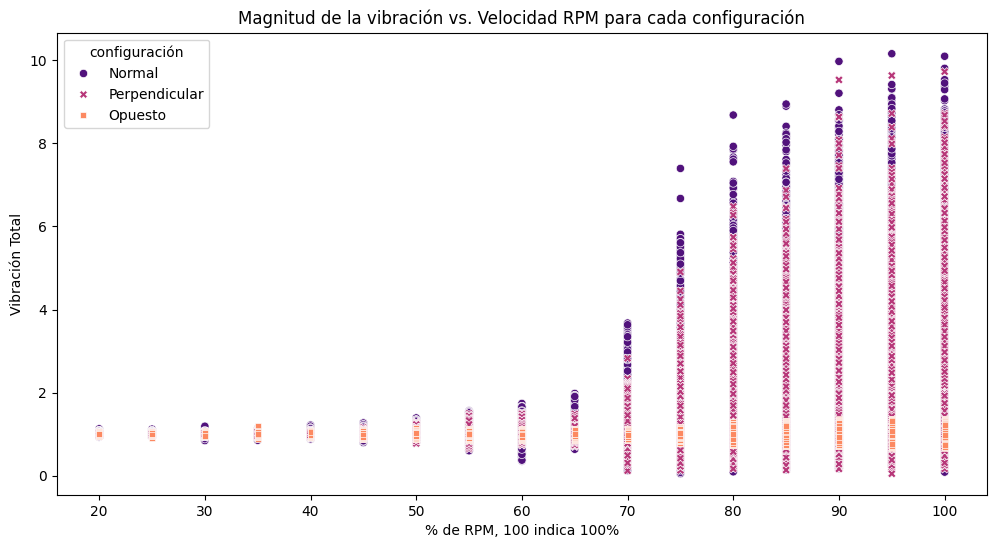

In [13]:
# Creadon la nueva característica de magnitud de vibración
df['vibration_magnitude'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)


df['configuración'] = df['wconfid'].map({1: 'Normal', 2: 'Perpendicular', 3: 'Opuesto'})


plt.figure(figsize=(12, 6))
sns.scatterplot(x='pctid', y='vibration_magnitude', hue='configuración', style='configuración', palette='magma', data=df)
plt.title('Magnitud de la vibración vs. Velocidad RPM para cada configuración')
plt.xlabel('% de RPM, 100 indica 100%')
plt.ylabel('Vibración Total')
plt.show()


***Conclusiones del análisis***
<p>Con base en la información recabada durante el proceso de EDA (Análisis exploratorio de datos) hemos decidido implementar un modelo de clasificación que nos permita predecir la configuración de pesos utilizada a partir de la vibración en cada uno de los ejes y la magnitud total de vibración</p>

A continuación vamos a correr 3 experimentos distintos los cuales vamos a monitorear mediante MLFlow, donde compararemos 3 modelos, RandomForest, SVM y XGBoost, esto con el objetivo de identificar el mejor modelo y los mejores hyperparámetros 

In [14]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

import warnings
warnings.filterwarnings("ignore")

***Preparación de los datos***

In [15]:
# Step 2: Prepare the data for the model

X = df[['x', 'y', 'z', 'pctid', 'vibration_magnitude']]
y = df['wconfid'] - 1  # Adjutando las etiquetas para que comiencen desde 0

# DATA VERSIONING
# Guardar el DataFrame original como un Dataset en MLflow
with mlflow.start_run(run_name="Data_Versioning"):
    # Create a Dataset from the DataFrame
    dataset = mlflow.data.from_pandas(
        df,
        source="accelerometer.csv",
        targets='wconfid',
        name="accelerometer_data"
    )
    
    # Registrar el Dataset en MLflow
    mlflow.log_input(dataset, context="training")
    
    # Guardar el DataFrame después del feature eng. como un archivo CSV
    df.to_csv("processed_data.csv", index=False)
    mlflow.log_artifact("/home/kurtbadelt/MNA/MLOPS/MLOps/notebooks/Actividades/Fase1/equipo16_accel/data/processed/processed_data.csv")


# Step 3: Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlflow.set_tracking_uri("http://172.29.4.89:5000")
mlflow.set_experiment("Vibration_Configuration_Classification")

<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1727796075042, experiment_id='3', last_update_time=1727796075042, lifecycle_stage='active', name='Vibration_Configuration_Classification', tags={}>

La siguiente función se utiliza para loggear cada corrida de búsqueda de hyper parámetros

In [16]:
def log_model_run(params, model, X_train, X_test, y_train, y_test, run_name):
    with mlflow.start_run(run_name=run_name) as run:
        # Log parameters
        for param_name, param_value in params.items():
            mlflow.log_param(param_name, param_value)
        
        # Combine X_train and y_train into a DataFrame
        if isinstance(X_train, pd.DataFrame):
            X_train_df = X_train.copy()
        else:
            X_train_df = pd.DataFrame(X_train, columns=['x', 'y', 'z', 'pctid', 'vibration_magnitude'])
        
        y_train_df = pd.Series(y_train, name='target')
        train_df = pd.concat([X_train_df.reset_index(drop=True), y_train_df.reset_index(drop=True)], axis=1)
        
        # Create a Dataset object from the training data
        dataset = mlflow.data.from_pandas(
            train_df,
            targets='target',
            name=f"training_data_{run_name}"
        )
        mlflow.log_input(dataset, context="training")

        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
    
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        # Optionally, log the classification report as an artifact
        cls_report = classification_report(y_test, y_pred, output_dict=False)
        with open("classification_report.txt", "w") as f:
            f.write(cls_report)
        mlflow.log_artifact("classification_report.txt")
        
        # Log the confusion matrix as an image artifact
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title('Confusion Matrix')
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.close(fig)
        
        # Log the model
        mlflow.sklearn.log_model(model, f"{run_name}_model")
        
        print(f"{run_name} Model Accuracy: {accuracy}")
        print(f"Run ID: {run.info.run_id}")




***RANDOM FOREST***

In [17]:
from sklearn.model_selection import ParameterGrid

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'max_features': ['sqrt', 'log2', None] 
}


# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid_rf):
    
    model_rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        max_features=params['max_features'],
        random_state=42
    )
    
    # Log the run
    run_name = f"RandomForest_n{params['n_estimators']}_depth{params['max_depth']}_features{params['max_features']}"
    log_model_run(params, model_rf, X_train_full, X_test, y_train_full, y_test, run_name)
    
    




2024/10/06 07:38:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:38:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depthNone_featuressqrt at: http://172.29.4.89:5000/#/experiments/3/runs/6a26a73db73b4e408e3be0a4dc5416f6.
2024/10/06 07:38:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depthNone_featuressqrt Model Accuracy: 0.7128104575163399
Run ID: 6a26a73db73b4e408e3be0a4dc5416f6


2024/10/06 07:39:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:39:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depthNone_featuressqrt at: http://172.29.4.89:5000/#/experiments/3/runs/4cd0b4de6ed3416cb089727b4fd63fd4.
2024/10/06 07:39:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depthNone_featuressqrt Model Accuracy: 0.7161764705882353
Run ID: 4cd0b4de6ed3416cb089727b4fd63fd4


2024/10/06 07:39:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:39:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depthNone_featureslog2 at: http://172.29.4.89:5000/#/experiments/3/runs/4622ed327842445ab62cdcaae5ff1fb4.
2024/10/06 07:39:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depthNone_featureslog2 Model Accuracy: 0.7128104575163399
Run ID: 4622ed327842445ab62cdcaae5ff1fb4


2024/10/06 07:40:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:40:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depthNone_featureslog2 at: http://172.29.4.89:5000/#/experiments/3/runs/984acdd72280488d94e1521f6367acb5.
2024/10/06 07:40:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depthNone_featureslog2 Model Accuracy: 0.7161764705882353
Run ID: 984acdd72280488d94e1521f6367acb5


2024/10/06 07:40:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:40:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depthNone_featuresNone at: http://172.29.4.89:5000/#/experiments/3/runs/faec3e2a005742ddab1988102004dc81.
2024/10/06 07:40:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depthNone_featuresNone Model Accuracy: 0.7104901960784313
Run ID: faec3e2a005742ddab1988102004dc81


2024/10/06 07:41:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:41:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depthNone_featuresNone at: http://172.29.4.89:5000/#/experiments/3/runs/eb97788a2b714995be713b9d1dc759af.
2024/10/06 07:41:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depthNone_featuresNone Model Accuracy: 0.7110130718954248
Run ID: eb97788a2b714995be713b9d1dc759af


2024/10/06 07:41:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:41:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depth10_featuressqrt at: http://172.29.4.89:5000/#/experiments/3/runs/db44d38a10ba4a0a81b0896c5abde1e6.
2024/10/06 07:41:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depth10_featuressqrt Model Accuracy: 0.6775163398692811
Run ID: db44d38a10ba4a0a81b0896c5abde1e6


2024/10/06 07:41:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:41:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depth10_featuressqrt at: http://172.29.4.89:5000/#/experiments/3/runs/cf882a95376440b389c0093e0fe33b7f.
2024/10/06 07:41:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depth10_featuressqrt Model Accuracy: 0.6791176470588235
Run ID: cf882a95376440b389c0093e0fe33b7f


2024/10/06 07:42:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:42:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depth10_featureslog2 at: http://172.29.4.89:5000/#/experiments/3/runs/bf0e8d2e9ff74c26aeb3e5e4630935d7.
2024/10/06 07:42:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depth10_featureslog2 Model Accuracy: 0.6775163398692811
Run ID: bf0e8d2e9ff74c26aeb3e5e4630935d7


2024/10/06 07:42:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:42:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depth10_featureslog2 at: http://172.29.4.89:5000/#/experiments/3/runs/31c3c5f76f7e43e38138704b671ee18e.
2024/10/06 07:42:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depth10_featureslog2 Model Accuracy: 0.6791176470588235
Run ID: 31c3c5f76f7e43e38138704b671ee18e


2024/10/06 07:42:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:42:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n50_depth10_featuresNone at: http://172.29.4.89:5000/#/experiments/3/runs/be3390d3271b4dbc9749ff6d8adc3898.
2024/10/06 07:42:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n50_depth10_featuresNone Model Accuracy: 0.6902287581699347
Run ID: be3390d3271b4dbc9749ff6d8adc3898


2024/10/06 07:42:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:42:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest_n100_depth10_featuresNone at: http://172.29.4.89:5000/#/experiments/3/runs/4daa940717c045ffbaa0764b4648b5d6.
2024/10/06 07:42:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


RandomForest_n100_depth10_featuresNone Model Accuracy: 0.6900980392156862
Run ID: 4daa940717c045ffbaa0764b4648b5d6


***SVM***

In [18]:
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Scale the features
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid_svm):
    # Create a new SVM model with the current hyperparameters
    model_svm = SVC(
        kernel=params['kernel'],
        C=params['C'],
        gamma=params['gamma'],
        random_state=42
    )
    
    # Log the run
    run_name = f"SVM_kernel{params['kernel']}_C{params['C']}_gamma{params['gamma']}"
    log_model_run(params, model_svm, X_train_full_scaled, X_test_scaled, y_train_full, y_test, run_name)
    
    




2024/10/06 07:48:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/06 07:48:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM_kernellinear_C0.1_gammascale at: http://172.29.4.89:5000/#/experiments/3/runs/9711cc81154442528dbc22fae3b5795c.
2024/10/06 07:48:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://172.29.4.89:5000/#/experiments/3.


SVM_kernellinear_C0.1_gammascale Model Accuracy: 0.5467973856209151
Run ID: 9711cc81154442528dbc22fae3b5795c


***XGBOOST***

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid_xgb):
    # Create a new XGBoost model with the current hyperparameters
    model_xgb = xgb.XGBClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )
    
    # Log the run
    run_name = f"XGBoost_n{params['n_estimators']}_depth{params['max_depth']}_lr{params['learning_rate']}_subsample{params['subsample']}"
    log_model_run(params, model_xgb, X_train_full, X_test, y_train_full, y_test, run_name)
    
    

